In [1]:
#medical research tool
from langchain_community.retrievers import PubMedRetriever
from langchain_core.tools import tool

@tool
def medicalResearchTool(query: str):
    """ this tool uses PubMed retriever from Langchain community that has data for biomedical literature from MEDLINE, 
    life science journals, and online books. Citations may include links to full text content from PubMed Central and publisher web sites.
    Search PubMedRetriever from langchain community for user query and return the results """
    medicalReserachTool = PubMedRetriever()
    result=medicalReserachTool.invoke(query)
    return f"Result for {query} is: \n{result}"

In [2]:
print(medicalResearchTool.invoke("what is cardiothoracic?"))

Too Many Requests, waiting for 0.20 seconds...
Result for what is cardiothoracic? is: 
[Document(metadata={'uid': '40613688', 'Title': 'Investigating the long-term durability of prosthetic valves in patients who have undergone tetralogy of Fallot surgery with transannular patch.', 'Published': '2025-07-04', 'Copyright Information': '© The Author(s) 2025. Published by Oxford University Press on behalf of the European Association for Cardio-Thoracic Surgery.'}, page_content='OBJECTIVES: This study aimed to determine the longevity of bioprosthetic valves or valved conduits in the pulmonary position and the factors associated with prosthetic valve longevity in patients who underwent surgical repair of Tetralogy of Fallot.\nMETHODS: We performed a single-center retrospective study in patients undergoing placement of a bioprosthesis or valved conduit in patients operated for Tetralogy of Fallot with a transannular patch. The primary end-point was freedom from pulmonary valve replacement rein

In [3]:
print(medicalResearchTool.invoke("what is frozen shoulder?"))

Too Many Requests, waiting for 0.20 seconds...
Too Many Requests, waiting for 0.40 seconds...
Result for what is frozen shoulder? is: 
[Document(metadata={'uid': '40611801', 'Title': 'Effects of acromioclavicular and coracoclavicular ligament stability on acromioclavicular joint dislocation: insights from a cadaveric study.', 'Published': '2025-07-02', 'Copyright Information': ''}, page_content='BACKGROUND: Acromioclavicular (AC) joint (ACJ) dislocation can lead to superior clavicular instability when the AC and coracoclavicular (CC) ligaments are torn. No previous study has assessed the effects of combined AC-CC ligament resections in fresh-frozen cadavers with preserved soft tissues around the thorax and shoulder girdle. This study aimed to develop such an ACJ dislocation model and evaluate stability following ligament resections.\nMETHODS: Nine fresh-frozen cadaver shoulders (mean age, 86.6 years) without clavicular fractures or ACJ osteoarthritis were used. Each specimen included t

In [4]:
""" from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()

llm=ChatGroq(model="deepseek-r1-distill-llama-70b") """

' from langchain_groq import ChatGroq\nfrom dotenv import load_dotenv\nload_dotenv()\n\nllm=ChatGroq(model="deepseek-r1-distill-llama-70b") '

In [5]:
#using open AI
from dotenv import load_dotenv
load_dotenv()
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o")

In [6]:
print(llm.invoke("What is the capital of France?").content)

The capital of France is Paris.


In [7]:
from langgraph.prebuilt import create_react_agent
from langchain_core.messages import AIMessage, HumanMessage
from langgraph.types import Command
from langgraph.graph import MessagesState,StateGraph,START, END
from typing import Literal
from typing_extensions import TypedDict

In [8]:
class State(MessagesState):
    next:str

In [10]:
class ResearchRouter(TypedDict):
    """Worker to route to next. If no workers needed, route to FINISH"""
    next: Literal['medicalResearcher', 'financeResearcher', 'FINISH']

In [11]:
researchMembers=["medicalResearcher","financeResearcher"]

In [12]:
research_system_prompt = f""""
You are a supervisor of Research Team, tasked with managing a conversation between the following workers: {researchMembers}. 
Given the following user request, respond with the worker to act next. 
Each worker will perform a task and respond with their results and status. 
When finished, respond with FINISH.
"""

In [13]:
def researchSupervisor_agent(state:State)->Command[Literal['medicalResearcher', 'financeResearcher', '__end__']]:
    
    messages = [{"role": "system", "content": research_system_prompt},] + state["messages"]
    
    llm_with_structure_output=llm.with_structured_output(ResearchRouter)
    
    response=llm_with_structure_output.invoke(messages)
    print("*****response****")
    print(response)
    
    goto=response["next"]

    
    print("**********BELOW IS MY GOTO***************")
    
    print(goto)
    
    if goto == "FINISH":
        goto=END
    
    
    return Command(goto=goto, update={"next":goto})

In [14]:
medical_system_prompt = """
You are a Medical researcher. Use the tool provided to you to answer the question on Medical research and respond back to supervisor.
If tool doesnt respond say I dont know answer. Don't ask follow-up questions

you have access to PubMed Database Retriever. It comprises of more than 35 million citations for biomedical literature from MEDLINE, 
life science journals, and online books. Citations may include links to full text content from PubMed Central and publisher web sites.
Answer the question only using the tool only. If you need more information to provide a complete answer, ask for clarification. 
When appropriate, suggest additional analyses that might be helpful.
"""

In [15]:
def medicalResearch_agent(state: State) -> Command[Literal["ResearchSupervisor"]]:
    
    medicalresearch_agent = create_react_agent(llm, tools=[medicalResearchTool], prompt=medical_system_prompt)
    
    result=medicalresearch_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="medicalResearcher")
            ]
        },
        goto="ResearchSupervisor",
    )
    

In [16]:
#using financil datasets - dint work
""" from dotenv import load_dotenv
import os 
load_dotenv()

from langchain_community.agent_toolkits.financial_datasets.toolkit import FinancialDatasetsToolkit
from langchain_community.utilities.financial_datasets import FinancialDatasetsAPIWrapper

api_wrapper = FinancialDatasetsAPIWrapper(
    financial_datasets_api_key=os.environ["FINANCIAL_DATASETS_API_KEY"]
)
toolkit = FinancialDatasetsToolkit(api_wrapper=api_wrapper)
financeResearchTools = toolkit.get_tools() """

' from dotenv import load_dotenv\nimport os \nload_dotenv()\n\nfrom langchain_community.agent_toolkits.financial_datasets.toolkit import FinancialDatasetsToolkit\nfrom langchain_community.utilities.financial_datasets import FinancialDatasetsAPIWrapper\n\napi_wrapper = FinancialDatasetsAPIWrapper(\n    financial_datasets_api_key=os.environ["FINANCIAL_DATASETS_API_KEY"]\n)\ntoolkit = FinancialDatasetsToolkit(api_wrapper=api_wrapper)\nfinanceResearchTools = toolkit.get_tools() '

In [17]:
finance_system_prompt = """
You are an advanced financial analysis AI assistant equipped with specialized tools
to access and analyze financial data. Your primary function is to help users with
financial analysis by retrieving and interpreting income statements, balance sheets,
and cash flow statements for publicly traded companies.

You have access to the following tools from the FinancialDatasetsToolkit:

1. Balance Sheets: Retrieves balance sheet data for a given ticker symbol.
2. Income Statements: Fetches income statement data for a specified company.
3. Cash Flow Statements: Accesses cash flow statement information for a particular ticker.

Your capabilities include:

1. Retrieving financial statements for any publicly traded company using its ticker symbol.
2. Analyzing financial ratios and metrics based on the data from these statements.
3. Comparing financial performance across different time periods (e.g., year-over-year or quarter-over-quarter).
4. Identifying trends in a company's financial health and performance.
5. Providing insights on a company's liquidity, solvency, profitability, and efficiency.
6. Explaining complex financial concepts in simple terms.

When responding to queries:

1. Always specify which financial statement(s) you're using for your analysis.
2. Provide context for the numbers you're referencing (e.g., fiscal year, quarter).
3. Explain your reasoning and calculations clearly.
4. If you need more information to provide a complete answer, ask for clarification.
5. When appropriate, suggest additional analyses that might be helpful.

Remember, your goal is to provide accurate, insightful financial analysis to
help users make informed decisions. Always maintain a professional and objective tone in your responses.
"""

In [18]:
""" def financeResearch_agent(state: State) -> Command[Literal["ResearchSupervisor"]]:
    
    financeResearch_agent = create_react_agent(llm, tools=[financeResearchTools], prompt=finance_system_prompt)
    
    result=financeResearch_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="financeResearcher")
            ]
        },
        goto="ResearchSupervisor",
    )
     """

' def financeResearch_agent(state: State) -> Command[Literal["ResearchSupervisor"]]:\n\n    financeResearch_agent = create_react_agent(llm, tools=[financeResearchTools], prompt=finance_system_prompt)\n\n    result=financeResearch_agent.invoke(state)\n\n    return Command(\n        update={\n            "messages": [\n                HumanMessage(content=result["messages"][-1].content, name="financeResearcher")\n            ]\n        },\n        goto="ResearchSupervisor",\n    )\n     '

In [19]:
# using yahoo finance
import yfinance as yf
ticker_obj = yf.Ticker("AAPL")
print(ticker_obj.info['previousClose'])
info = ticker_obj.get_info()
print(info)
#print(info['previousClose'])


212.44
{'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '(408) 996-1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcast

In [20]:
@tool
def financeReseacherTool(ticker: str):
    """this tool returns information for a ticker from Yahoo Finance"""
    ticker_obj = yf.Ticker(ticker)
    return ticker_obj.get_info()


In [21]:
financeReseacherTool.invoke("What is AAPL's latest stock price?")

HTTP Error 404: 


{'trailingPegRatio': None}

In [22]:
def financeResearch_agent(state: State) -> Command[Literal["ResearchSupervisor"]]:
    
    financeResearch_agent = create_react_agent(llm, tools=[financeReseacherTool], prompt="you are finance expert. use tool provided to you to answer user query. Don't ask follow-up questions")
    
    result=financeResearch_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="financeResearcher")
            ]
        },
        goto="ResearchSupervisor",
    )
    

In [23]:
graph=StateGraph(State)
graph.add_node("ResearchSupervisor", researchSupervisor_agent)
graph.add_node("medicalResearcher", medicalResearch_agent)
graph.add_node("financeResearcher", financeResearch_agent)
graph.add_edge(START, "ResearchSupervisor")


In [24]:
researchApp=graph.compile()

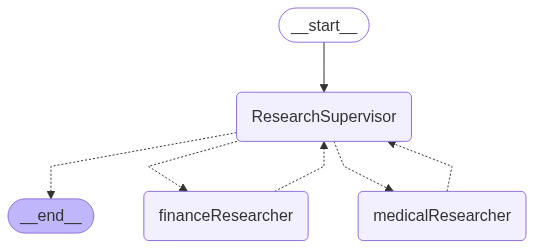

In [25]:
from IPython.display import display,Image
display(Image(researchApp.get_graph().draw_mermaid_png()))

In [26]:
for s in researchApp.stream(
    {
        "messages": [
            (
                "user",
                "what is frozen shoulder?",
            )
        ]
    },
    {"recursion_limit": 10},
):
    print(s)
    print("***BELOW IS MY STATE*******")

*****response****
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher
{'ResearchSupervisor': {'next': 'medicalResearcher'}}
***BELOW IS MY STATE*******
Too Many Requests, waiting for 0.20 seconds...
Too Many Requests, waiting for 0.40 seconds...
{'medicalResearcher': {'messages': [HumanMessage(content='Frozen shoulder, also known as adhesive capsulitis, is a condition characterized by significant pain and progressively restricted shoulder movements. Diagnosis is primarily clinical, based on patient history and physical examination, with imaging tools like ultrasound and MRI being used as adjuncts. The condition is often self-limiting, but for some patients, it can lead to long-term disabilities. Risk factors include diabetes, thyroid disease, and dyslipidemia.\n\nThe management of frozen shoulder is mainly non-invasive and includes medications, physical therapy, electrical stimulation, and manual therapy. Intra-articular steroid injections are reco

In [27]:
for s in researchApp.stream(
    {
        "messages": [
            (
                "user",
                "What is AAPL's latest stock price?",
            )
        ]
    },
    {"recursion_limit": 10},
):
    print(s)
    print("***BELOW IS MY STATE*******")
    

*****response****
{'next': 'financeResearcher'}
**********BELOW IS MY GOTO***************
financeResearcher
{'ResearchSupervisor': {'next': 'financeResearcher'}}
***BELOW IS MY STATE*******
{'financeResearcher': {'messages': [HumanMessage(content='The latest stock price for Apple Inc. (AAPL) is $213.55.', additional_kwargs={}, response_metadata={}, name='financeResearcher', id='20b346de-e43c-4315-8d07-30b138dbe223')]}}
***BELOW IS MY STATE*******
*****response****
{'next': 'FINISH'}
**********BELOW IS MY GOTO***************
FINISH
{'ResearchSupervisor': {'next': '__end__'}}
***BELOW IS MY STATE*******


In [ ]:
""" for s in researchApp.stream({"messages": [("user", "What's the cardiothoracic?")]}, subgraphs=True):
    print(s)
    print("**********BELOW IS MY STATE***************") """

response
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher
((), {'ResearchSupervisor': {'next': 'medicalResearcher'}})
**********BELOW IS MY STATE***************
(('medicalResearcher:ec1ed336-9dd2-92f4-1c4c-c81f0c19f754',), {'agent': {'messages': [AIMessage(content='It seems like you might be referring to "cardiothoracic," which relates to the heart and chest cavity. However, "cardithoracic" isn\'t a recognized medical term. Could you clarify if you meant "cardiothoracic"? If so, I can provide information on that topic. If not, please provide more context so I can assist you better.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 363, 'prompt_tokens': 308, 'total_tokens': 671, 'completion_time': 1.59956118, 'prompt_time': 0.02076569, 'queue_time': 0.200515747, 'total_time': 1.62032687}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, 

BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': ''}}

In [ ]:
#app.invoke({"messages":[("user","what is cardiothoracic?")]},subgraphs=True)

response
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher
Too Many Requests, waiting for 0.20 seconds...
response
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher
Too Many Requests, waiting for 0.20 seconds...
Too Many Requests, waiting for 0.40 seconds...
response
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher
response
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher


BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': ''}}

In [ ]:
#app.invoke({"messages":"What is AAPL's latest stock price?"},subgraphs=True)

response
{'next': 'financeResearcher'}
**********BELOW IS MY GOTO***************
financeResearcher
response
{'next': 'FINISH'}
**********BELOW IS MY GOTO***************
FINISH


((),
 {'messages': [HumanMessage(content="What is AAPL's latest stock price?", additional_kwargs={}, response_metadata={}, id='8d954f7e-1107-4ade-90bc-db901bc206eb'),
   HumanMessage(content='The latest stock price of AAPL (Apple Inc.) is **$213.55**.', additional_kwargs={}, response_metadata={}, name='financeResearcher', id='ab0147fc-fd24-418e-aba1-d49dfb487325')],
  'next': '__end__'})

In [ ]:
#app.invoke({"messages":"What is frozen shoulder?"},subgraphs=True)

response
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher
response
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher
Too Many Requests, waiting for 0.20 seconds...
Too Many Requests, waiting for 0.40 seconds...
response
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher
Too Many Requests, waiting for 0.20 seconds...
Too Many Requests, waiting for 0.40 seconds...
response
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher
Too Many Requests, waiting for 0.20 seconds...
response
{'next': 'financeResearcher'}
**********BELOW IS MY GOTO***************
financeResearcher
response
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher
response
{'next': 'financeResearcher'}
**********BELOW IS MY GOTO***************
financeResearcher
response
{'next': 'financeResearcher'}
**********BELOW IS MY GOTO*******

((),
 {'messages': [HumanMessage(content='What is frozen shoulder?', additional_kwargs={}, response_metadata={}, id='95be38f2-d2b5-4e42-9aa1-00f019c0d192'),
   HumanMessage(content='Frozen shoulder, also known as adhesive capsulitis, is a condition characterized by stiffness and pain in the shoulder joint. Here\'s an organized overview:\n\n### Definition:\n- **Name:** Frozen Shoulder or Adhesive Capsulitis\n- **Description:** The shoulder joint becomes stiff and movement is limited due to inflammation and the "freezing" of the joint capsule.\n\n### Causes:\n- Often follows an injury or period of immobility.\n- Can be associated with conditions like diabetes or thyroid issues.\n- Gradual onset, potentially linked to inflammation or immobilization.\n\n### Symptoms:\n- Pain in the shoulder and upper arm.\n- Limited range of motion, making everyday activities difficult.\n- Gradual progression from pain to stiffness.\n\n### Diagnosis:\n- Physical examination focusing on range of motion.\n- 

### Report team generation

In [41]:
print(WORKING_DIRECTORY)

/var/folders/2p/546b1qt146v9czmxms2shl1w0000gn/T/tmp0pjmm4h2


In [44]:
print(_TEMP_DIRECTORY)

<TemporaryDirectory '/var/folders/2p/546b1qt146v9czmxms2shl1w0000gn/T/tmp9m4xh03t'>


In [52]:
print(type(_TEMP_DIRECTORY.name))

<class 'str'>


In [51]:
print(Path(_TEMP_DIRECTORY.name))

/var/folders/2p/546b1qt146v9czmxms2shl1w0000gn/T/tmp9m4xh03t


In [45]:
print(WORKING_DIRECTORY)

/Users/kuldeep/Documents/mriduladata/agenticAICourse/agentic2.0/langgraph/assignments


In [53]:
from pathlib import Path
from tempfile import TemporaryDirectory
from typing import Dict, Optional, Annotated,List

from langchain_experimental.utilities import PythonREPL
from typing_extensions import TypedDict

_TEMP_DIRECTORY = TemporaryDirectory()
WORKING_DIRECTORY = Path(_TEMP_DIRECTORY.name)
WORKING_DIRECTORY=Path("/Users/kuldeep/Documents/mriduladata/agenticAICourse/agentic2.0/langgraph/assignments")


@tool
def create_outline(
    points: Annotated[List[str], "List of main points or sections."],
    file_name: Annotated[str, "File path to save the outline."],
) -> Annotated[str, "Path of the saved outline file."]:
    """Create and save an outline."""
    with (WORKING_DIRECTORY / file_name).open("w") as file:
        for i, point in enumerate(points):
            file.write(f"{i + 1}. {point}\n")
    return f"Outline saved to {file_name}"


@tool
def read_document(
    file_name: Annotated[str, "File path to read the document from."],
    start: Annotated[Optional[int], "The start line. Default is 0"] = None,
    end: Annotated[Optional[int], "The end line. Default is None"] = None,
) -> str:
    """Read the specified document."""
    with (WORKING_DIRECTORY / file_name).open("r") as file:
        lines = file.readlines()
    if start is None:
        start = 0
    return "\n".join(lines[start:end])


@tool
def write_document(
    content: Annotated[str, "Text content to be written into the document."],
    file_name: Annotated[str, "File path to save the document."],
) -> Annotated[str, "Path of the saved document file."]:
    """Create and save a text document."""
    with (WORKING_DIRECTORY / file_name).open("w") as file:
        file.write(content)
    return f"Document saved to {file_name}"


@tool
def edit_document(
    file_name: Annotated[str, "Path of the document to be edited."],
    inserts: Annotated[
        Dict[int, str],
        "Dictionary where key is the line number (1-indexed) and value is the text to be inserted at that line.",
    ],
) -> Annotated[str, "Path of the edited document file."]:
    """Edit a document by inserting text at specific line numbers."""

    with (WORKING_DIRECTORY / file_name).open("r") as file:
        lines = file.readlines()

    sorted_inserts = sorted(inserts.items())

    for line_number, text in sorted_inserts:
        if 1 <= line_number <= len(lines) + 1:
            lines.insert(line_number - 1, text + "\n")
        else:
            return f"Error: Line number {line_number} is out of range."

    with (WORKING_DIRECTORY / file_name).open("w") as file:
        file.writelines(lines)

    return f"Document edited and saved to {file_name}"


In [58]:
points = ["Introduction", "Methods", "Results", "Discussion", "Conclusion"]
file_name = "my_outline.txt"
create_outline.invoke(points,file_name)

AttributeError: 'str' object has no attribute 'items'

In [49]:
create_outline.invoke(points=["mridulais cool, everybody is cool"], file_name="test.txt",input=["test"])

ValidationError: 1 validation error for create_outline
  Input should be a valid dictionary or instance of create_outline [type=model_type, input_value=['test'], input_type=list]
    For further information visit https://errors.pydantic.dev/2.11/v/model_type

In [59]:
class ReportRouter(TypedDict):
    """Worker to route to next. If no workers needed, route to FINISH"""
    next: Literal['noteTaker', 'docWriter', 'FINISH']

In [60]:
reportMembers=["noteTaker","docWriter"]

In [31]:
report_system_prompt = f""""
You are a supervisor of Writing Team, tasked with managing a conversation between the following workers: {reportMembers}. 
Given the following user request, respond with the worker to act next. 
Each worker will perform a task and respond with their results and status. 
When finished, respond with FINISH.
"""

In [61]:
def reportSupervisor_agent(state:State)->Command[Literal['noteTaker', 'docWriter', '__end__']]:
    
    messages = [{"role": "system", "content": report_system_prompt},] + state["messages"]
    
    llm_with_structure_output=llm.with_structured_output(ReportRouter)
    
    response=llm_with_structure_output.invoke(messages)
    print("response")
    print(response)
    
    goto=response["next"]

    
    print("**********BELOW IS MY GOTO***************")
    
    print(goto)
    
    if goto == "FINISH":
        goto=END
    
    # class State(MessagesState):
    #   next:str
    # output of the state: state={"messages": ["hi"], "next": "researcher"}
    
    return Command(goto=goto, update={"next":goto})

In [62]:
#note taking agent
def noteTaking_agent(state: State) -> Command[Literal["ReportSupervisor"]]:
    
    noteTaking_agent = create_react_agent(llm, tools=[create_outline,read_document], prompt="You can read documents and create outlines for the document writer. Don't ask follow-up questions")
    
    result=noteTaking_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="noteTaker")
            ]
        },
        goto="ReportSupervisor",
    )
    


In [63]:
#doc writer agent
def docWriter_agent(state: State) -> Command[Literal["ReportSupervisor"]]:
    
    docWriter_agent = create_react_agent(llm, tools=[write_document,edit_document,read_document], prompt="You can read, write and edit documents based on note-taker's outlines. Don't ask follow-up questions.")
    
    result=docWriter_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="docWriter")
            ]
        },
        goto="ReportSupervisor",
    )
    

In [64]:
paper_graph=StateGraph(State)
paper_graph.add_node("ReportSupervisor", reportSupervisor_agent)
paper_graph.add_node("noteTaker", noteTaking_agent)
paper_graph.add_node("docWriter", docWriter_agent)
paper_graph.add_edge(START, "ReportSupervisor")


In [65]:
writerApp=paper_graph.compile()

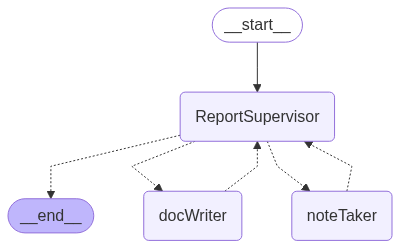

In [66]:
from IPython.display import display,Image
display(Image(writerApp.get_graph().draw_mermaid_png()))

In [67]:
for s in writerApp.stream(
    {
        "messages": [
            (
                "user",
                "Write an outline for poem about cats and then write the poem to disk.",
            )
        ]
    },
    {"recursion_limit": 10},
):
    print(s)
    print("---")

response
{'next': 'noteTaker'}
**********BELOW IS MY GOTO***************
noteTaker
{'ReportSupervisor': {'next': 'noteTaker'}}
---
{'noteTaker': {'messages': [HumanMessage(content='I\'ve created the outline for the poem about cats and saved it as "poem_outline_cats.txt". You can now proceed to write the poem using this outline.', additional_kwargs={}, response_metadata={}, name='noteTaker', id='662320a4-f3c4-4b53-a2e0-9176660667b6')]}}
---
response
{'next': 'docWriter'}
**********BELOW IS MY GOTO***************
docWriter
{'ReportSupervisor': {'next': 'docWriter'}}
---
{'docWriter': {'messages': [HumanMessage(content='The poem "Ode to Cats" has been written and saved as "ode_to_cats.txt" based on the provided outline.', additional_kwargs={}, response_metadata={}, name='docWriter', id='8fd3ffe6-8c0f-4779-be18-1e4fb46787d7')]}}
---
response
{'next': 'FINISH'}
**********BELOW IS MY GOTO***************
FINISH
{'ReportSupervisor': {'next': '__end__'}}
---


### combine 2 graphs

In [68]:
class TeamRouter(TypedDict):
    """Worker to route to next. If no workers needed, route to FINISH"""
    next: Literal['researchTeam', 'writingTeam', 'FINISH']

In [69]:
teamMembers=["researchTeam","writingTeam"]

In [70]:
team_system_prompt = f""""
You are Team supervisor of 2 teams: Research Team and Writing team, tasked with managing a conversation between the following workers: {teamMembers}. 
Given the following user request, respond with the worker to act next. 
Each worker will perform a task and respond with their results and status. 
When finished, respond with FINISH.
"""

In [72]:
# main supervisor
def teamSupervisor_agent(state:State)->Command[Literal['researchTeam', 'writingTeam', '__end__']]:
    
    messages = [{"role": "system", "content": team_system_prompt},] + state["messages"]
    
    llm_with_structure_output=llm.with_structured_output(TeamRouter)
    
    response=llm_with_structure_output.invoke(messages)
    print("response")
    print(response)
    
    goto=response["next"]

    
    print("**********BELOW IS MY GOTO***************")
    
    print(goto)
    
    if goto == "FINISH":
        goto=END
    
    # class State(MessagesState):
    #   next:str
    # output of the state: state={"messages": ["hi"], "next": "researcher"}
    
    return Command(goto=goto, update={"next":goto})


In [77]:
#Research Team
def callResearch_team(state: State) -> Command[Literal["TeamSupervisor"]]:
    
    result=researchApp.invoke({"messages":state["messages"][-1]})
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="researchTeam")
            ]
        },
        goto="TeamSupervisor",
    )
    

In [78]:
#Writing Team
def callWriting_team(state: State) -> Command[Literal["TeamSupervisor"]]:
    
    result=writerApp.invoke({"messages":state["messages"][-1]})
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="writingTeam")
            ]
        },
        goto="TeamSupervisor",
    )

In [79]:
super_graph=StateGraph(State)
super_graph.add_node("TeamSupervisor", teamSupervisor_agent)
super_graph.add_node("researchTeam", callResearch_team)
super_graph.add_node("writingTeam", callWriting_team)
super_graph.add_edge(START, "TeamSupervisor")

In [80]:
super_app=super_graph.compile()

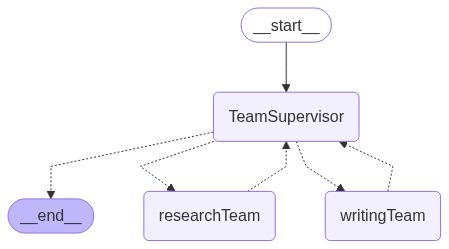

In [81]:
from IPython.display import display,Image
display(Image(super_app.get_graph().draw_mermaid_png()))

In [82]:
for s in super_app.stream(
    {
        "messages": [
            ("user", "Research frozen shoulder and write a brief report about them.")
        ],
    },
    {"recursion_limit": 20},
):
    print(s)
    print("---")

response
{'next': 'researchTeam'}
**********BELOW IS MY GOTO***************
researchTeam
{'TeamSupervisor': {'next': 'researchTeam'}}
---
*****response****
{'next': 'medicalResearcher'}
**********BELOW IS MY GOTO***************
medicalResearcher
*****response****
{'next': 'financeResearcher'}
**********BELOW IS MY GOTO***************
financeResearcher
*****response****
{'next': 'FINISH'}
**********BELOW IS MY GOTO***************
FINISH
{'researchTeam': {'messages': [HumanMessage(content='Frozen shoulder, or adhesive capsulitis, is a musculoskeletal condition characterized by pain and limited range of motion in the shoulder joint. It is typically a self-limiting condition that progresses through three stages: freezing, frozen, and thawing, each with distinct symptoms and duration.\n\nKey features and management include:\n\n1. **Etiology & Risk Factors**: The exact cause remains unclear, but it occurs more frequently in individuals with diabetes, thyroid disorders, and following prolonge